In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [53]:
def make_hist_with_prob_plot(size, skewness=0, random=None):


    sample = stats.skewnorm.rvs(a=skewness, size=size, random_state=random) 

    fig, ax = plt.subplots(1, 2, figsize=(12,4), gridspec_kw={'width_ratios': [2, 1.75]})

    ax[0].hist(sample, density=True, color = 'blue', alpha=0.1)
    ax[0].scatter(sample, stats.skewnorm.pdf(sample, skewness,), alpha=0.6, label='skewnorm pdf')
    
    ax[0].set_xlim(-1.2*np.max(np.abs(sample)), 1.2*np.max(np.abs(sample)))
    ax[0].set_ylabel("Densidade")
    ax[0].set_xlabel("Dados")
    ax[0].axvline(x=0, c="gray", ls="--", alpha=.25)

    x_y_data, params = stats.probplot(sample)
    line = params[1] + params[0]*x_y_data[0]

    ax[1].scatter(x_y_data[0], x_y_data[1], c="b", alpha=.6)
    ax[1].plot(x_y_data[0], line, ls="--", c="k")
    ax[1].set_xlabel("Quartis teóricos Normais")
    ax[1].set_ylabel("Dados ordenados")


    fig.suptitle(f"Tamanho amostral : {size}")
    plt.show()

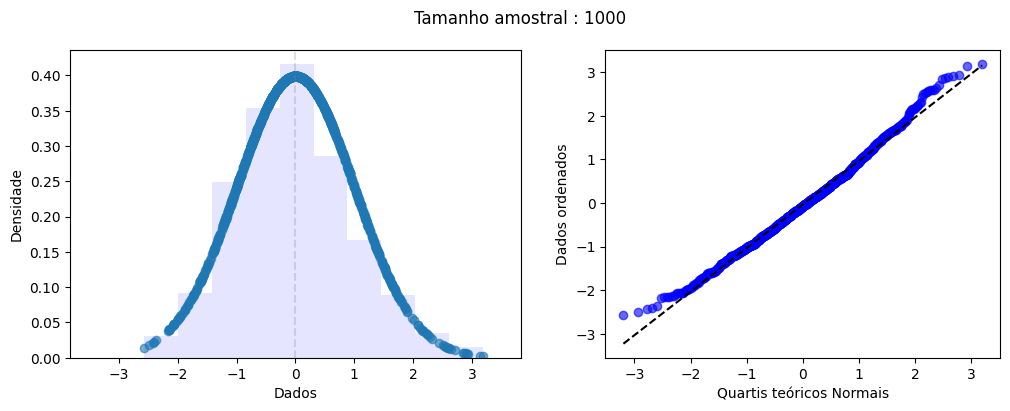

In [54]:
make_hist_with_prob_plot(1000, 0, 42)

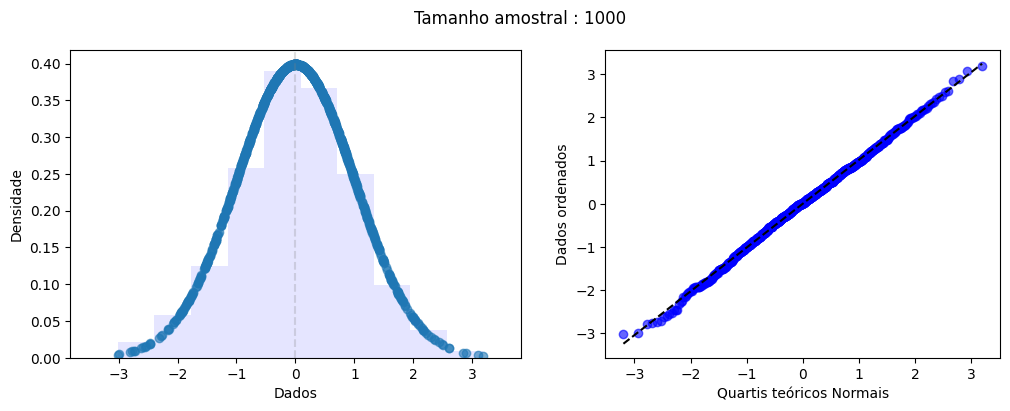

In [55]:
make_hist_with_prob_plot(1000, 0, 63)

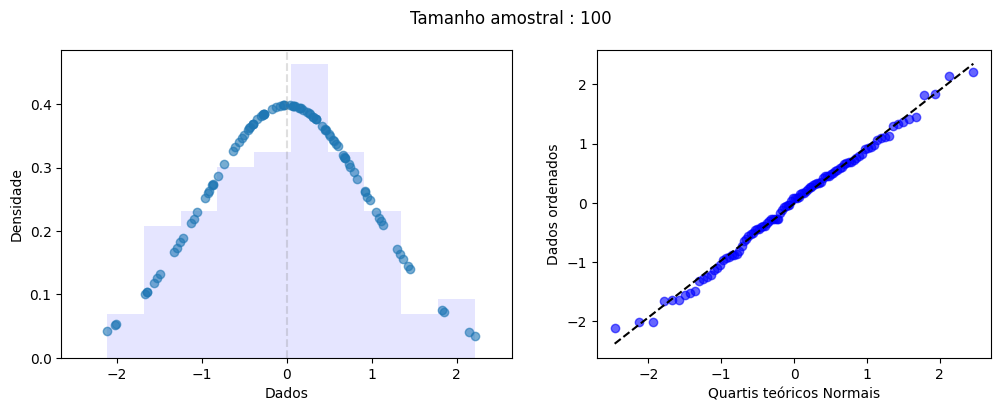

In [56]:
make_hist_with_prob_plot(100, 0, 63)

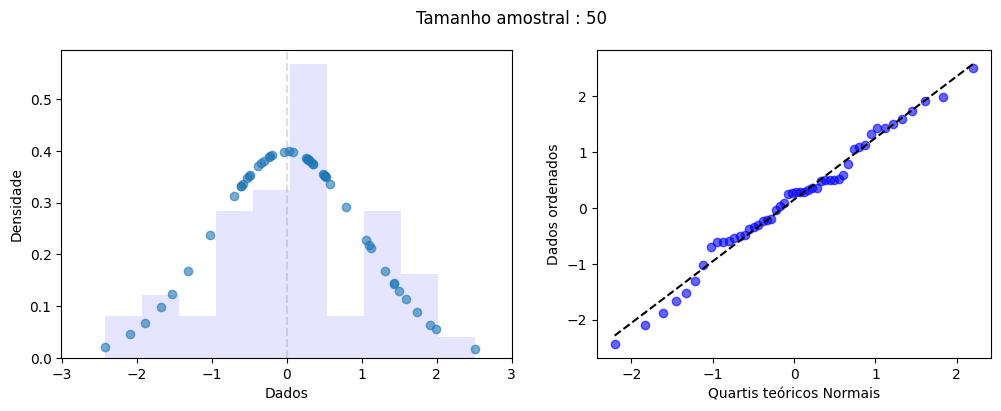

In [57]:
make_hist_with_prob_plot(50, 0, 63)

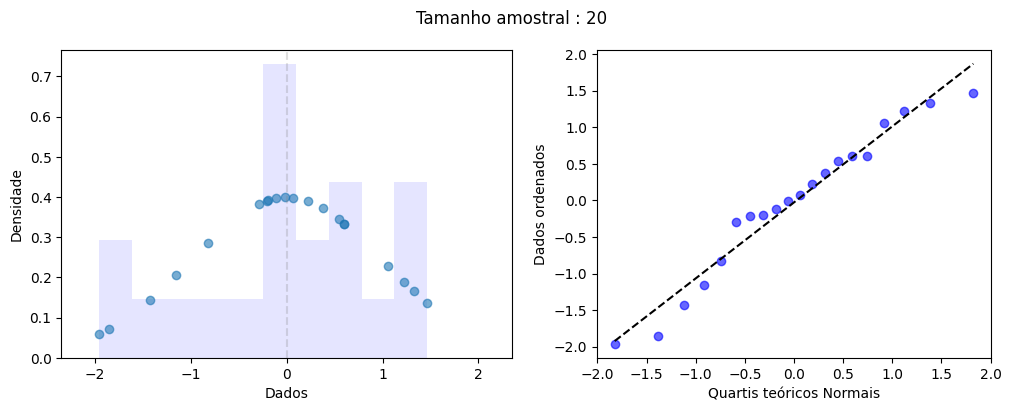

In [59]:
make_hist_with_prob_plot(20, 0, 42)

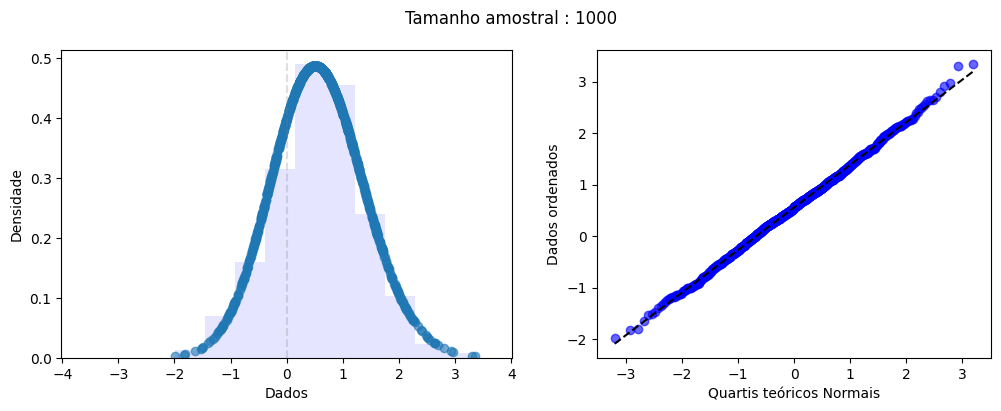

In [60]:
make_hist_with_prob_plot(1000, 1, 63)

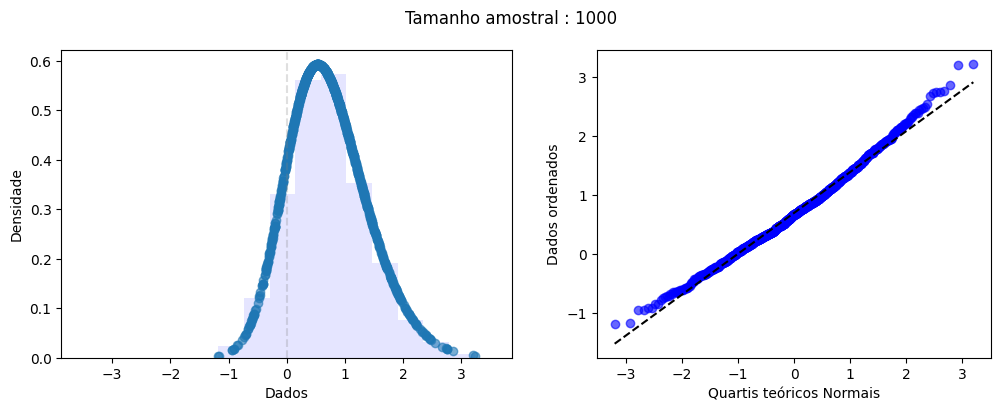

In [61]:
make_hist_with_prob_plot(1000, 2, 63)

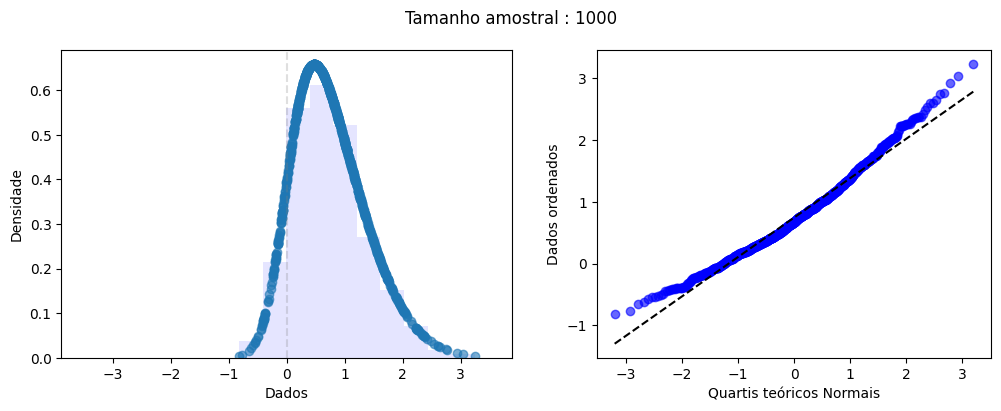

In [62]:
make_hist_with_prob_plot(1000, 3, 63)

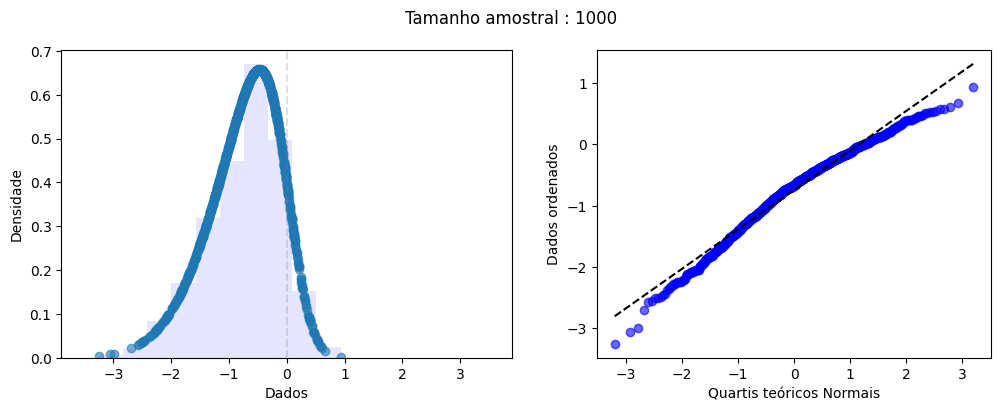

In [63]:
make_hist_with_prob_plot(1000, -3, 63)

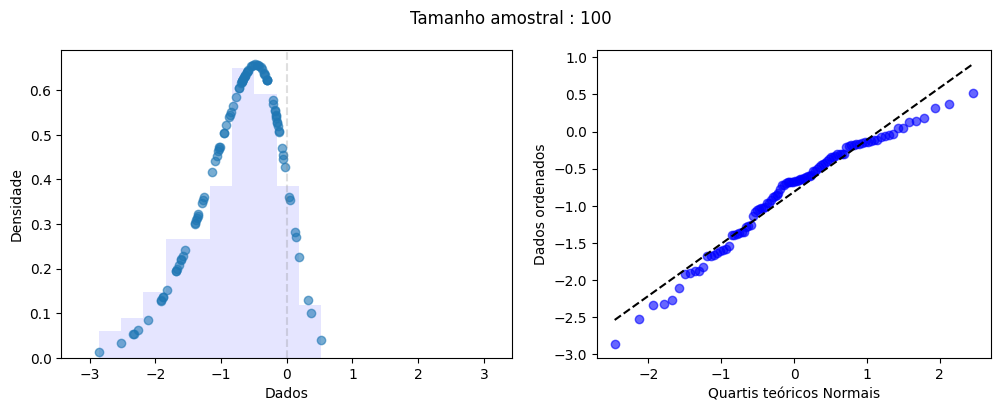

In [82]:
make_hist_with_prob_plot(100, -3, 63)

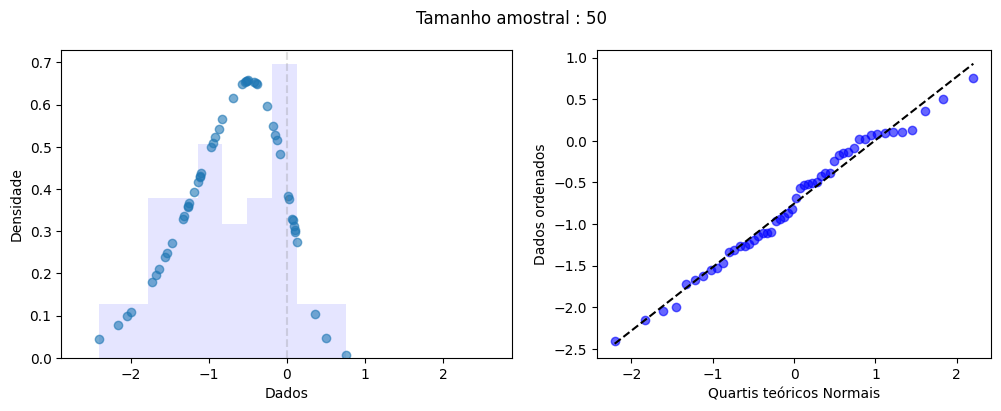

In [83]:
make_hist_with_prob_plot(50, -3, 63)

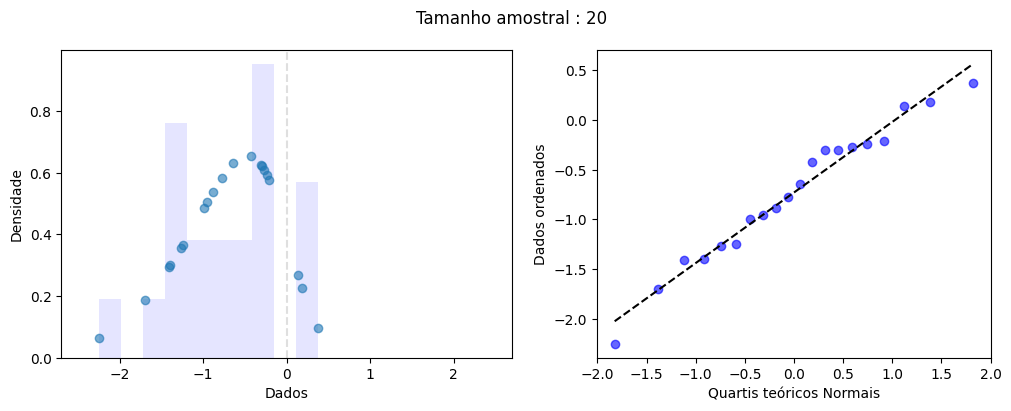

In [85]:
make_hist_with_prob_plot(20, -3, 63)

In [65]:
from scipy import stats, optimize

In [71]:
def random_by_sk(skew, kurt, size):
    def gengamma_error(a):
        s, k = (stats.gengamma.stats(a[0], a[1], moments="sk"))
        return (s - skew) ** 2 + (k - kurt) ** 2  # penalty equally weighted for skew and kurtosis

    a, c = optimize.minimize(gengamma_error, (1, 1)).x    
    return stats.gengamma.rvs(a, c, size=size)

n = random_by_sk(3, 3, 1000)
print("mean={}, var={}, skew={}, kurt={}".format(np.mean(n), np.var(n), stats.skew(n), stats.kurtosis(n)))
# will yield skew ~2 and kurtosis ~3 instead of 3, 3

mean=0.12740909719708907, var=0.05488420305800249, skew=1.9698919736114153, kurt=2.8456360832265055


In [72]:
n.size

1000

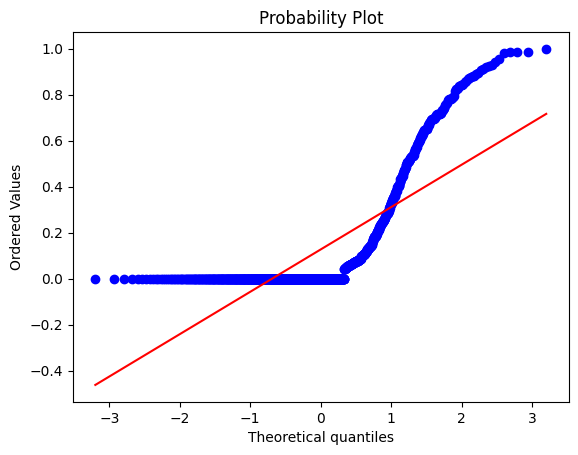

In [74]:
a = stats.probplot(n, plot=plt)

In [80]:
size = 100
skew = 0
kurt = 3

sample = random_by_sk(skew, kurt, 1000)

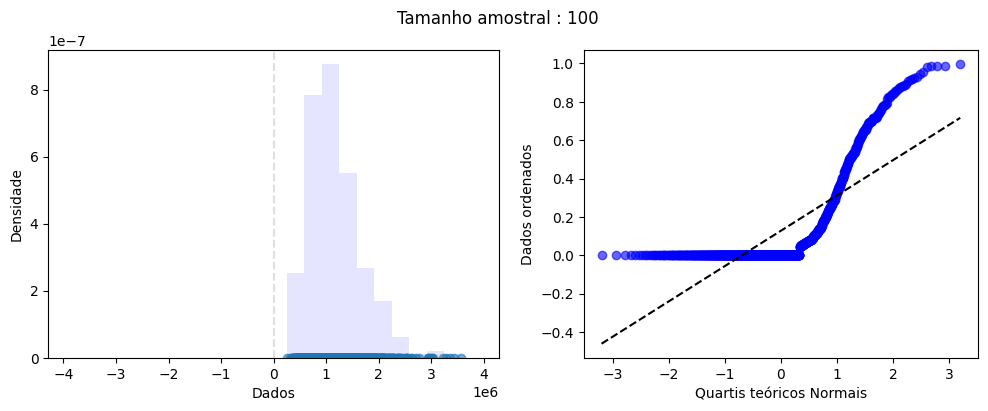

In [81]:
fig, ax = plt.subplots(1, 2, figsize=(12,4), gridspec_kw={'width_ratios': [2, 1.75]})

ax[0].hist(sample, density=True, color = 'blue', alpha=0.1)
ax[0].scatter(sample, stats.skewnorm.pdf(sample, skew,), alpha=0.6, label='skewnorm pdf')

ax[0].set_xlim(-1.2*np.max(np.abs(sample)), 1.2*np.max(np.abs(sample)))
ax[0].set_ylabel("Densidade")
ax[0].set_xlabel("Dados")
ax[0].axvline(x=0, c="gray", ls="--", alpha=.25)

x_y_data, params = stats.probplot(n)
line = params[1] + params[0]*x_y_data[0]

ax[1].scatter(x_y_data[0], x_y_data[1], c="b", alpha=.6)
ax[1].plot(x_y_data[0], line, ls="--", c="k")
ax[1].set_xlabel("Quartis teóricos Normais")
ax[1].set_ylabel("Dados ordenados")


fig.suptitle(f"Tamanho amostral : {size}")
plt.show()